In [12]:
pip install torch torchvision

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install 'numpy<2'


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy
print(numpy.__version__)

1.26.4


In [22]:

pip install matplotlib


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install seaborn pillow scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pandas-2.2.3-cp39-cp39-macosx_10_9_x86_64.whl (12.6 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:

pip install opencv-python fastapi uvicorn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
  Using cached fastapi-0.115.0-py3-none-any.whl (94 kB)
  Using cached uvicorn-0.31.0-py3-none-any.whl (63 kB)
  Using cached starlette-0.38.6-py3-none-any.whl (71 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl (434 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached pydantic_core-2.23.4-cp39-cp39-macosx_10_12_x86_64.whl (1.9 MB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached anyio-4.6.0-py3-none-any.whl (89 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image
from PIL import UnidentifiedImageError
from torch.utils.data import Dataset
from sklearn.preprocessing import label_binarize




In [4]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir

        # Создание списка файлов изображений и меток
        self.image_paths = []
        self.labels = []

        # Словарь для сопоставления меток с названиями папок
        label_mapping = {
            '0_degrees': 0,
            '90_degrees': 1,
            '180_degrees': 2,
            '270_degrees': 3
        }

        # Проходим по каждой папке, указанной в словаре
        for folder_name, label in label_mapping.items():
            folder_path = os.path.join(image_dir, folder_name)
            if os.path.exists(folder_path):
                for fname in os.listdir(folder_path):
                    if fname.endswith(('.png', '.jpg', '.jpeg')) and not fname.startswith('.'):
                        self.image_paths.append(os.path.join(folder_path, fname))
                        self.labels.append(label)  # Метка соответствует папке

        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        
        try:
            # Открываем изображение и конвертируем в RGB
            image = Image.open(img_path).convert("RGB")
        except UnidentifiedImageError:
            print(f"Не удалось распознать изображение: {img_path}")
            return None, None

        # Применяем преобразования, если они указаны
        if self.transform:
            image = self.transform(image)

        return image, label


In [5]:
transform = transforms.Compose([
    transforms.Resize((420, 340)),
    transforms.ToTensor(),  
])

In [6]:
# Путь к папкам с изображениями для обучения и тестирования
train_image_dir = "/Users/salux/Downloads/augment_images_3"
test_image_dir = "/Users/salux/Downloads/images_2"

# Создание тренировочного и тестового датасетов
train_dataset = ImageDataset(train_image_dir, transform=transform)
test_dataset = ImageDataset(test_image_dir, transform=transform)

# Создание DataLoader'ов для батчевой загрузки данных
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Train Dataset:


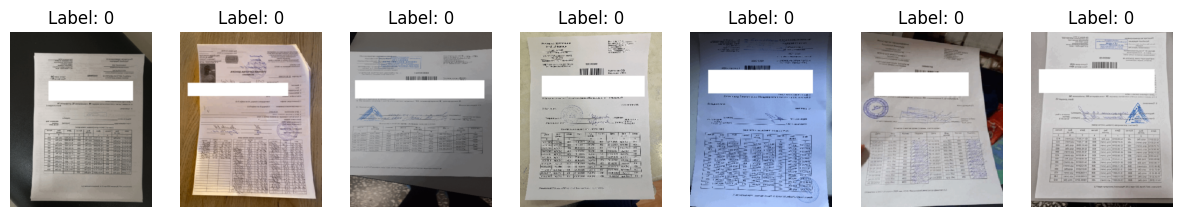

Test Dataset:


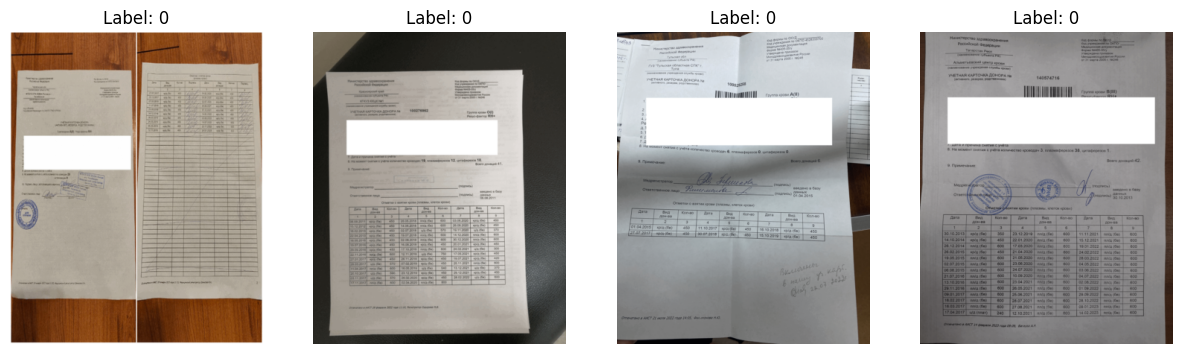

In [29]:
import matplotlib.pyplot as plt

def visualize_dataset(dataset, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        image, label = dataset[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0))  # Изменение порядка размерностей для визуализации
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Визуализация изображений из обучающего датасета
print("Train Dataset:")
visualize_dataset(train_dataset, num_images=7)

# Визуализация изображений из тестового датасета
print("Test Dataset:")
visualize_dataset(test_dataset, num_images=4)


In [30]:
unique_train_labels = set([train_dataset[i][1] for i in range(len(train_dataset))])
unique_test_labels = set([test_dataset[i][1] for i in range(len(test_dataset))])

print(f'Unique labels in training set: {unique_train_labels} (Classes: {["0°", "90°", "180°", "270°"]})')
print(f'Unique labels in testing set: {unique_test_labels} (Classes: {["0°", "90°", "180°", "270°"]})')


Unique labels in training set: {0, 1, 2, 3} (Classes: ['0°', '90°', '180°', '270°'])
Unique labels in testing set: {0, 1, 2, 3} (Classes: ['0°', '90°', '180°', '270°'])


In [31]:
from collections import Counter

def get_class_distribution(loader):
    class_counts = Counter()
    
    for images, labels in loader:
        class_counts.update(labels.numpy())  # Обновление счетчика классов
    
    return class_counts

# Получение распределения классов в train_loader
train_class_distribution = get_class_distribution(train_loader)
print('Class distribution in training DataLoader:')
for class_label, count in train_class_distribution.items():
    print(f'Class {["0°", "90°", "180°", "270°"][class_label]}: {count}')

# Получение распределения классов в test_loader
test_class_distribution = get_class_distribution(test_loader)
print('Class distribution in testing DataLoader:')
for class_label, count in test_class_distribution.items():
    print(f'Class {["0°", "90°", "180°", "270°"][class_label]}: {count}')


Class distribution in training DataLoader:
Class 180°: 138
Class 270°: 109
Class 0°: 138
Class 90°: 118
Class distribution in testing DataLoader:
Class 0°: 16
Class 90°: 11
Class 180°: 11
Class 270°: 11


In [7]:
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    model.train()  # Переводим модель в режим обучения
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Переносим данные на устройство (CPU/GPU)
            images, labels = images.to(device), labels.to(device)

            # Обнуляем градиенты
            optimizer.zero_grad()

            # Прямой проход
            outputs = model(images)

            # Вычисляем потери
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Обратный проход и оптимизация
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')
    return model


In [12]:
def test_model(model, test_loader):
    model.eval()  # Переводим модель в режим тестирования
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_labels), np.array(all_preds), outputs.cpu().numpy()


In [9]:
# Загрузка предобученной модели ResNet-18
model = models.resnet18(pretrained=True)

# Замена последнего слоя на новый, соответствующий количеству классов (4)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 класса: 0°, 90°, 180°, 270°

# Перемещение модели на устройство (CPU или GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Определите количество эпох для обучения
num_epochs = 10  # Вы можете настроить это значение

# Обучение модели
model = train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch [1/10], Loss: 0.3126
Epoch [2/10], Loss: 0.0328
Epoch [3/10], Loss: 0.0131
Epoch [4/10], Loss: 0.0035
Epoch [5/10], Loss: 0.0017
Epoch [6/10], Loss: 0.0008
Epoch [7/10], Loss: 0.0005
Epoch [8/10], Loss: 0.0006
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0002


In [13]:
def visualize_confusion_matrix(true_labels, predicted_labels):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0°', '90°', '180°', '270°'],
                yticklabels=['0°', '90°', '180°', '270°'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [23]:
def plot_roc_curves(true_labels, scores):
    # Binarize the output
    y_bin = label_binarize(true_labels, classes=[0, 1, 2, 3])
    n_classes = y_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i * 90))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [15]:
true_labels, predicted_labels, outputs = test_model(model, test_loader)

# Оценка точности
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.96%


In [16]:
print(classification_report(true_labels, predicted_labels, target_names=['0°', '90°', '180°', '270°']))

              precision    recall  f1-score   support

          0°       0.94      1.00      0.97        16
         90°       1.00      1.00      1.00        11
        180°       1.00      0.91      0.95        11
        270°       1.00      1.00      1.00        11

    accuracy                           0.98        49
   macro avg       0.99      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



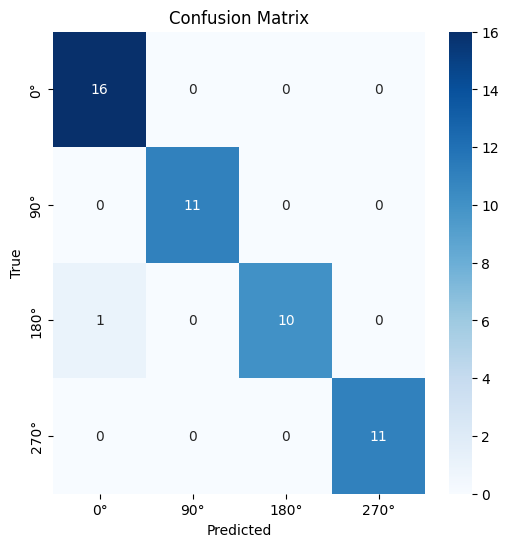

In [17]:
visualize_confusion_matrix(true_labels, predicted_labels)

In [25]:
def test_model(model, test_loader):
    model.eval()
    true_labels = []
    predicted_probabilities = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Получаем выходы модели
            outputs = model(images)
            
            # Преобразуем выходы модели в вероятности с помощью softmax
            probabilities = torch.softmax(outputs, dim=1)
            
            true_labels.extend(labels.cpu().numpy())
            predicted_probabilities.extend(probabilities.cpu().numpy())
    
    return np.array(true_labels), np.array(predicted_probabilities)


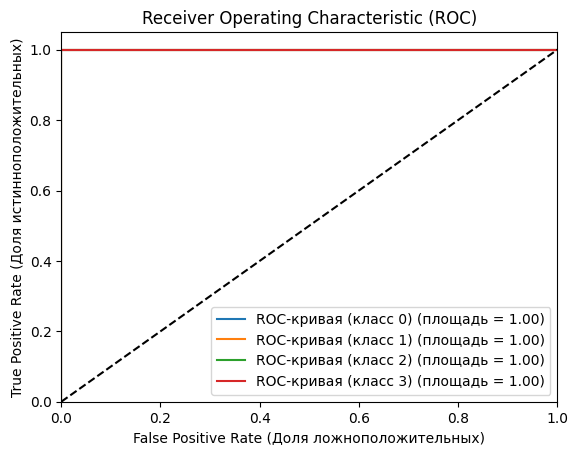

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Получение истинных меток и предсказанных вероятностей
true_labels, predicted_probabilities = test_model(model, test_loader)

# Количество классов (в вашем случае это 4)
n_classes = 4

# Бинаризация истинных меток (true_labels)
true_labels_bin = label_binarize(true_labels, classes=[0, 1, 2, 3])

# Инициализация графика
plt.figure()

# Построение ROC и расчет AUC для каждого класса
for i in range(n_classes):
    # ROC-кривая
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_probabilities[:, i])
    
    # AUC (площадь под кривой)
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_probabilities[:, i])
    
    # Отрисовка ROC-кривой для каждого класса
    plt.plot(fpr, tpr, label=f'ROC-кривая (класс {i}) (площадь = {roc_auc:0.2f})')

# Настройка графика
plt.plot([0, 1], [0, 1], 'k--')  # Линия 45°
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Доля ложноположительных)')
plt.ylabel('True Positive Rate (Доля истинноположительных)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
